In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df=pd.read_csv('D:\laptop_pred\laptops.csv')

In [67]:
df.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.shape

(1303, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

Unnamed: 0          0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [68]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [9]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [69]:
df.Ram=df.Ram.str.replace('GB','')
df.Weight=df.Weight.str.replace('kg','')

In [11]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60


In [70]:
df.Ram=df.Ram.astype('int32')
df.Weight=df.Weight.astype('float32')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price_euros       1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(8)
memory usage: 112.1+ KB


C:\Users\Muthu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

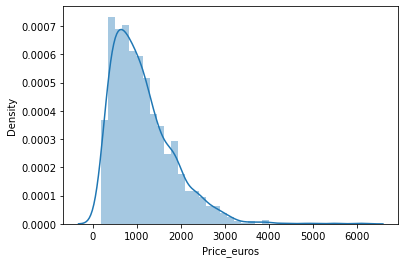

In [14]:
sns.distplot(df['Price_euros'])

Text(0, 0.5, 'Number of Laptops')

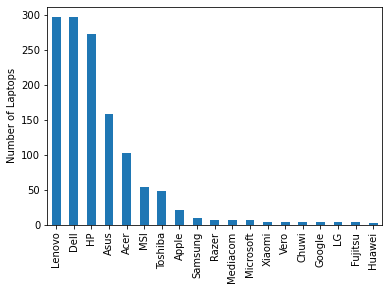

In [15]:
df.Company.value_counts().plot(kind='bar')
plt.ylabel('Number of Laptops')

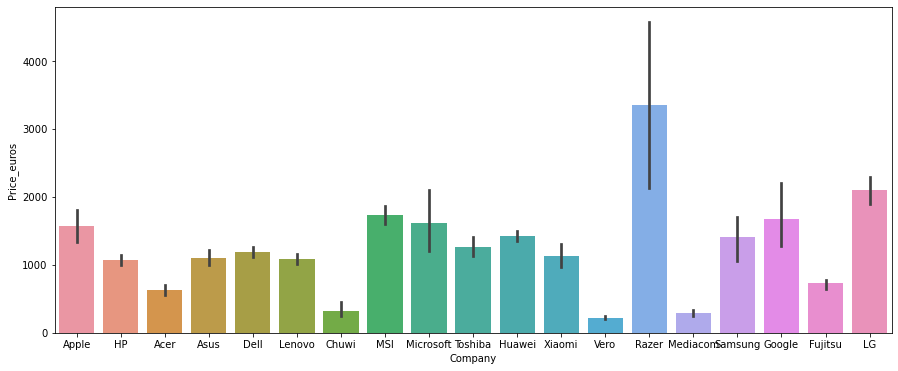

In [16]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['Company'],y=df['Price_euros'])
plt.show()

<AxesSubplot:>

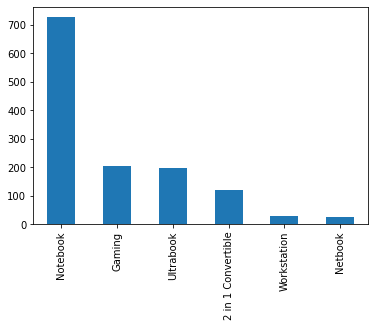

In [17]:
df.TypeName.value_counts().plot(kind='bar')

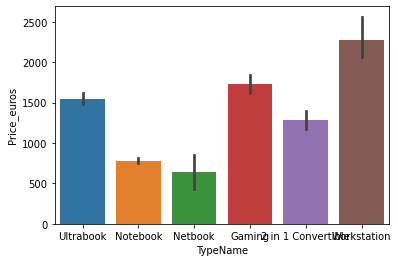

In [18]:
sns.barplot(x=df['TypeName'],y=df['Price_euros'])
plt.show()

C:\Users\Muthu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Inches', ylabel='Density'>

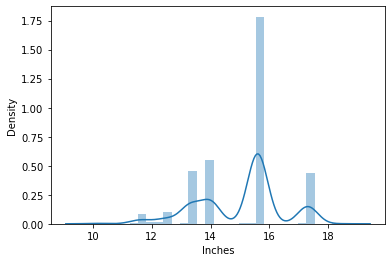

In [19]:
sns.distplot(df['Inches'])

In [20]:
df.Inches.value_counts()

15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
13.5      6
13.9      6
12.0      6
12.3      5
10.1      4
15.0      4
15.4      4
13.0      2
11.3      1
14.1      1
17.0      1
18.4      1
Name: Inches, dtype: int64

<AxesSubplot:xlabel='Inches', ylabel='Price_euros'>

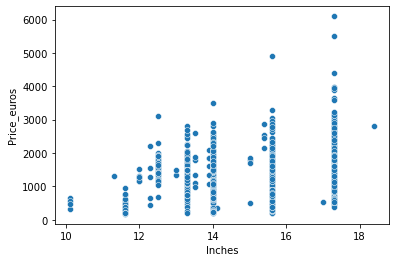

In [21]:
sns.scatterplot(x=df['Inches'],y=df['Price_euros'])

In [22]:
df.ScreenResolution.value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
4K Ultra HD 3840x2160                              7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [71]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [72]:
df.sample(5)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen
989,Dell,Latitude 5480,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,1.60,1119.00,0
515,Asus,VivoBook E12,Netbook,11.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,2,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.10,245.00,0
431,Lenovo,Thinkpad 13,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.40,1010.00,0
1297,Asus,X556UJ-XO044T (i7-6500U/4GB/500GB/GeForce,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4,500GB HDD,Nvidia GeForce 920M,Windows 10,2.20,720.32,0
160,Asus,X555BP-XX180T (A9-9420/4GB/1TB/Radeon,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4,1TB HDD,AMD Radeon R5 M420,Windows 10,2.03,403.00,0


<AxesSubplot:>

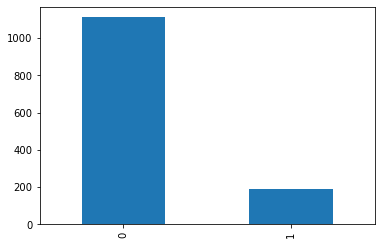

In [25]:
df.Touchscreen.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Touchscreen', ylabel='Price_euros'>

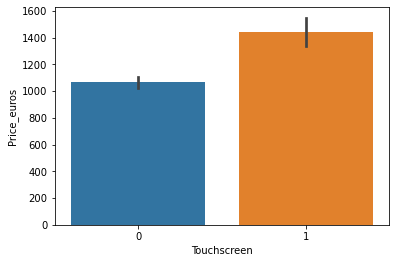

In [26]:
sns.barplot(x=df['Touchscreen'],y=df['Price_euros'])

In [73]:
df['Ips']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [10]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1


<AxesSubplot:>

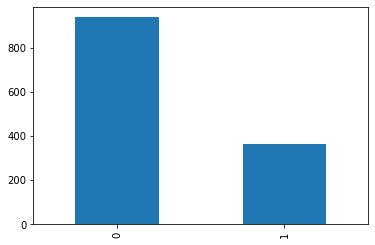

In [29]:
df.Ips.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Ips', ylabel='Price_euros'>

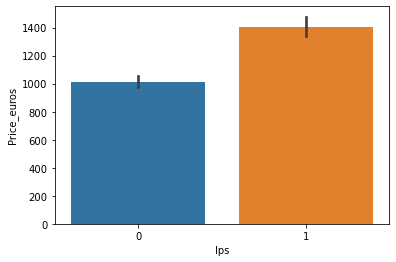

In [30]:
sns.barplot(x=df['Ips'],y=df['Price_euros'])

In [74]:
new=df['ScreenResolution'].str.split('x',n=1,expand=True)

In [75]:
df['X_res']=new[0]
df['Y_res']=new[1]

In [13]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,Full HD 1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,IPS Panel Retina Display 2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,IPS Panel Retina Display 2560,1600


In [76]:
x=list(df['X_res'])
x_res=[]
for i in range(len(x)):
    x_res.append(int(x[i].split()[-1]))

In [35]:
x_res

[2560,
 1440,
 1920,
 2880,
 2560,
 1366,
 2880,
 1440,
 1920,
 1920,
 1366,
 1920,
 2880,
 1920,
 2304,
 2560,
 1920,
 2880,
 1920,
 1920,
 1366,
 1920,
 1366,
 1920,
 1920,
 1366,
 1440,
 1920,
 1920,
 1920,
 1920,
 1366,
 1920,
 3200,
 1440,
 1366,
 1366,
 1920,
 1366,
 1920,
 1920,
 1920,
 1366,
 1920,
 1920,
 2560,
 1366,
 1920,
 1920,
 1366,
 1920,
 1920,
 1920,
 1920,
 1366,
 1920,
 1920,
 1366,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1366,
 1366,
 1920,
 1920,
 2256,
 1920,
 1920,
 1920,
 1366,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 2304,
 1920,
 1920,
 1366,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 2256,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 3200,
 1920,
 1366,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,
 1366,
 1366,
 1920,
 1366,
 1920,
 1920,
 1366,
 1920,
 1920,
 1920,
 1366,
 1920,
 1366,
 1920,
 1920,
 1920,
 1920,
 1920,
 1920,

In [77]:
df['X_res']=x_res

In [78]:
df['X_res']

0       2560
1       1440
2       1920
3       2880
4       2560
        ... 
1298    1920
1299    3200
1300    1366
1301    1366
1302    1366
Name: X_res, Length: 1303, dtype: int64

In [79]:
df['Y_res']=df['Y_res'].astype('int')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   int32  
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   float32
 11  Price_euros       1303 non-null   float64
 12  Touchscreen       1303 non-null   int64  
 13  Ips               1303 non-null   int64  
 14  X_res             1303 non-null   int64  
 15  Y_res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(2), int64

In [40]:
df.corr()['Price_euros']

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price_euros    1.000000
Touchscreen    0.191226
Ips            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price_euros, dtype: float64

In [41]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


In [80]:
df.drop(['ScreenResolution','Product'],axis=1,inplace=True)

In [81]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600


In [44]:
df.Cpu.value_counts()

Intel Core i5 7200U 2.5GHz              190
Intel Core i7 7700HQ 2.8GHz             146
Intel Core i7 7500U 2.7GHz              134
Intel Core i7 8550U 1.8GHz               73
Intel Core i5 8250U 1.6GHz               72
                                       ... 
Intel Core M 6Y54 1.1GHz                  1
Intel Core i5 1.3GHz                      1
Intel Atom Z8350 1.92GHz                  1
Intel Pentium Dual Core 4405Y 1.5GHz      1
Intel Core i7 2.2GHz                      1
Name: Cpu, Length: 118, dtype: int64

In [82]:
df['Cpu_name']=df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [46]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res,Cpu_name
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,Intel Core i5


In [83]:
def fetch_processor(text):
    if text=='Intel Core i5' or text=='Intel Core i7' or text=='Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [84]:
df['Cpu_brand']=df['Cpu_name'].apply(fetch_processor)

In [23]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res,Cpu_name,Cpu_brand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,Intel Core i5,Intel Core i5


<AxesSubplot:>

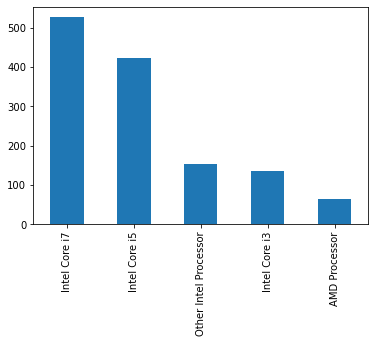

In [50]:
df.Cpu_brand.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Cpu_brand', ylabel='Price_euros'>

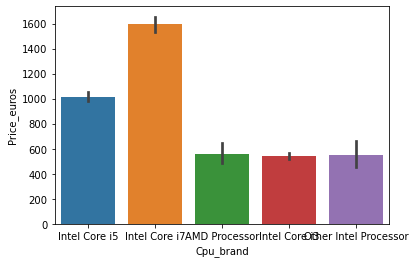

In [51]:
sns.barplot(x=df['Cpu_brand'],y=df['Price_euros'])

In [85]:
df.drop(['Cpu','Cpu_name'],axis=1,inplace=True)

In [53]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res,Cpu_brand
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,Intel Core i5
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,Intel Core i5
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,Intel Core i5
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,Intel Core i7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,Intel Core i5


In [54]:
df.Ram.value_counts()

8     619
4     375
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

<AxesSubplot:xlabel='Ram', ylabel='Price_euros'>

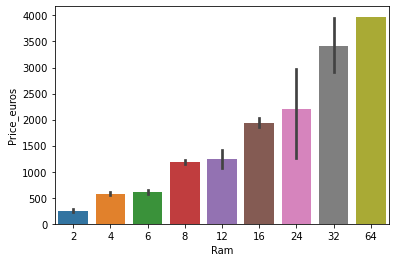

In [55]:
sns.barplot(x=df['Ram'],y=df['Price_euros'])

In [56]:
df.Memory.value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
64GB Flash Storage +  1TB HDD      1
1

In [86]:
df['Memory']=df['Memory'].astype(str).replace('\.0','',regex=True)
df['Memory']=df['Memory'].str.replace('GB','')
df['Memory']=df['Memory'].str.replace('TB','000')
new=df['Memory'].str.split('+',n=1,expand=True)
df['First']=new[0]
df['First']=df['First'].str.strip()
df['Second']=new[1]

In [58]:
df.sample(5)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res,Cpu_brand,First,Second
1251,HP,Notebook,15.6,4,500 HDD,AMD Radeon R4 Graphics,Windows 10,1.86,399.0,0,0,1366,768,AMD Processor,500 HDD,None
502,Lenovo,2 in 1 Convertible,13.9,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.40,1599.0,1,1,1920,1080,Intel Core i5,256 SSD,None
1234,Apple,Ultrabook,11.6,4,256 Flash Storage,Intel HD Graphics 6000,Mac OS X,1.08,959.0,0,0,1366,768,Intel Core i5,256 Flash Storage,None
132,Acer,Ultrabook,14.0,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.60,884.0,0,1,1920,1080,Intel Core i7,256 SSD,None
966,Dell,Notebook,15.6,4,500 HDD,Intel HD Graphics 620,Windows 10,1.90,825.0,0,0,1366,768,Intel Core i5,500 HDD,None


In [87]:
df['Layer1HDD']=df['First'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer1SSD']=df['First'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer1Hybrid']=df['First'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer1Flash_Storage']=df['First'].apply(lambda x:1 if 'Flash Storage' in x else 0)
df['First']=df['First'].str.replace(r'\D','')

<ipython-input-87-eef070a5e80a>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['First']=df['First'].str.replace(r'\D','')


In [60]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res,Cpu_brand,First,Second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,Intel Core i5,128,None,0,1,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,Intel Core i5,128,None,0,0,0,1
2,HP,Notebook,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,Intel Core i5,256,None,0,1,0,0
3,Apple,Ultrabook,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,Intel Core i7,512,None,0,1,0,0
4,Apple,Ultrabook,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,Intel Core i5,256,None,0,1,0,0


In [88]:
df['Second'].fillna('0',inplace=True)

In [62]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res,Cpu_brand,First,Second,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage
0,Apple,Ultrabook,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,Intel Core i5,128,0,0,1,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,Intel Core i5,128,0,0,0,0,1
2,HP,Notebook,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,Intel Core i5,256,0,0,1,0,0
3,Apple,Ultrabook,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,Intel Core i7,512,0,0,1,0,0
4,Apple,Ultrabook,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,Intel Core i5,256,0,0,1,0,0


In [89]:
df['Layer2HDD']=df['Second'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer2SSD']=df['Second'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer2Hybrid']=df['Second'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer2Flash_Storage']=df['Second'].apply(lambda x:1 if 'Flash Storage' in x else 0)
df['Second']=df['Second'].str.replace(r'\D','')

<ipython-input-89-cffd119e8602>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Second']=df['Second'].str.replace(r'\D','')


In [90]:
df['First']=df['First'].astype(int)
df['Second']=df['Second'].astype(int)

In [91]:
df['HDD']=(df['First']*df['Layer1HDD'])+(df['Second']*df['Layer2HDD'])
df['SSD']=(df['First']*df['Layer1SSD'])+(df['Second']*df['Layer2SSD'])
df['Hybrid']=(df['First']*df['Layer1Hybrid'])+(df['Second']*df['Layer2Hybrid'])
df['Flash_Storage']=(df['First']*df['Layer1Flash_Storage'])+(df['Second']*df['Layer2Flash_Storage'])

In [66]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,...,0,0,0,0,0,0,0,128,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,...,0,1,0,0,0,0,0,0,0,128
2,HP,Notebook,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,...,0,0,0,0,0,0,0,256,0,0
3,Apple,Ultrabook,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,...,0,0,0,0,0,0,0,512,0,0
4,Apple,Ultrabook,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,...,0,0,0,0,0,0,0,256,0,0


In [92]:
df.drop(['First','Second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage','Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage'],axis=1,inplace=True)  

In [68]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,Intel Core i5,0,256,0,0


In [93]:
df.drop(['Memory'],axis=1,inplace=True)

In [70]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res,Cpu_brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,Intel Core i5,0,256,0,0


In [71]:
df.corr()['Price_euros']

Inches           0.068197
Ram              0.743007
Weight           0.210370
Price_euros      1.000000
Touchscreen      0.191226
Ips              0.252208
X_res            0.556529
Y_res            0.552809
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price_euros, dtype: float64

In [94]:
df.drop(['Hybrid','Flash_Storage'],axis=1,inplace=True)

In [95]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res,Cpu_brand,HDD,SSD
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,Intel Core i5,0,128
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,Intel Core i5,0,0
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,Intel Core i5,0,256
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,Intel Core i7,0,512
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,Intel Core i5,0,256


In [74]:
df.Gpu.value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon RX 560            1
ARM Mali T860 MP4            1
Nvidia GeForce GTX1060       1
AMD Radeon 540               1
Nvidia GeForce GTX 980       1
Name: Gpu, Length: 110, dtype: int64

In [96]:
df['Gpu_brand']=df['Gpu'].apply(lambda x:x.split()[0])

In [76]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res,Cpu_brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,0,1,2560,1600,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,898.94,0,0,1440,900,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,575.00,0,0,1920,1080,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,2537.45,0,1,2880,1800,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,0,1,2560,1600,Intel Core i5,0,256,Intel


In [77]:
df['Gpu_brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu_brand, dtype: int64

In [97]:
df=df[df['Gpu_brand']!='ARM']

In [98]:
df.Gpu_brand.value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu_brand, dtype: int64

<AxesSubplot:xlabel='Gpu_brand', ylabel='Price_euros'>

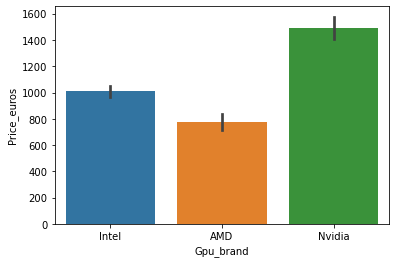

In [80]:
sns.barplot(x=df['Gpu_brand'],y=df['Price_euros'])

In [99]:
df.drop(['Gpu'],axis=1,inplace=True)

In [82]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res,Cpu_brand,HDD,SSD,Gpu_brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,1339.69,0,1,2560,1600,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,898.94,0,0,1440,900,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,8,No OS,1.86,575.00,0,0,1920,1080,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,16,macOS,1.83,2537.45,0,1,2880,1800,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,8,macOS,1.37,1803.60,0,1,2560,1600,Intel Core i5,0,256,Intel


In [83]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Windows 10 S       8
Mac OS X           8
Android            2
Name: OpSys, dtype: int64

<AxesSubplot:xlabel='OpSys', ylabel='Price_euros'>

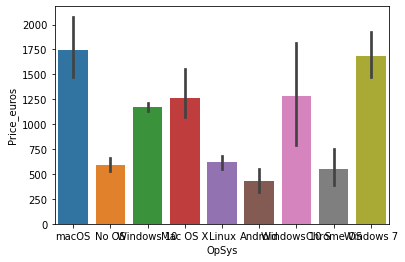

In [84]:
sns.barplot(x=df['OpSys'],y=df['Price_euros'])

In [100]:
def cat_os(inp):
    if inp=='Windows 10' or inp=='Windows 7' or inp=='Windows 10 S':
        return 'Windows'
    elif inp=='macOS' or inp=='Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [101]:
df['os']=df['OpSys'].apply(cat_os)

In [102]:
df.head()

,Company,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res,Cpu_brand,HDD,SSD,Gpu_brand,os
0,Apple,Ultrabook,13.3,8,macOS,1.37,1339.69,0,1,2560,1600,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,8,macOS,1.34,898.94,0,0,1440,900,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,8,No OS,1.86,575.00,0,0,1920,1080,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16,macOS,1.83,2537.45,0,1,2880,1800,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,8,macOS,1.37,1803.60,0,1,2560,1600,Intel Core i5,0,256,Intel,Mac


In [103]:
df.drop(['OpSys'],axis=1,inplace=True)

<AxesSubplot:xlabel='os', ylabel='Price_euros'>

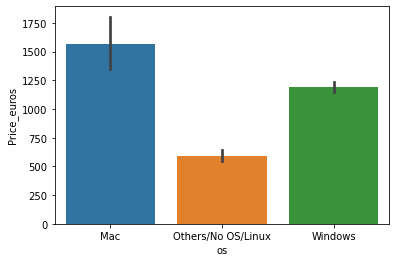

In [89]:
sns.barplot(x=df['os'],y=df['Price_euros'])

C:\Users\Muthu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weight', ylabel='Density'>

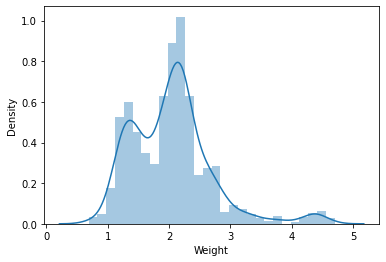

In [90]:
sns.distplot(df['Weight'])

<AxesSubplot:xlabel='Weight', ylabel='Price_euros'>

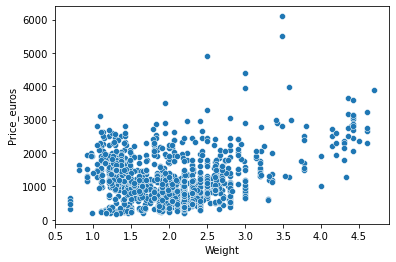

In [91]:
sns.scatterplot(x=df['Weight'],y=df['Price_euros'])

In [92]:
df.corr()

,Inches,Ram,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res,HDD,SSD
Inches,1.000000,0.237129,0.827397,0.067329,-0.359514,-0.112726,-0.069875,-0.092934,0.530468,-0.109364
Ram,0.237129,1.000000,0.383362,0.742905,0.118875,0.207949,0.434095,0.426357,0.095808,0.603379
Weight,0.827397,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.031866,-0.052041,0.514147,-0.063818
Price_euros,0.067329,0.742905,0.209867,1.000000,0.192917,0.253320,0.557369,0.554591,-0.096891,0.670660
Touchscreen,-0.359514,0.118875,-0.293004,0.192917,1.000000,0.148026,0.350097,0.355756,-0.208766,0.257577
Ips,-0.112726,0.207949,0.018643,0.253320,0.148026,1.000000,0.280588,0.287404,-0.093588,0.225311
X_res,-0.069875,0.434095,-0.031866,0.557369,0.350097,0.280588,1.000000,0.994480,-0.124872,0.528655
Y_res,-0.092934,0.426357,-0.052041,0.554591,0.355756,0.287404,0.994480,1.000000,-0.136141,0.521017
HDD,0.530468,0.095808,0.514147,-0.096891,-0.208766,-0.093588,-0.124872,-0.136141,1.000000,-0.400750
SSD,-0.109364,0.603379,-0.063818,0.670660,0.257577,0.225311,0.528655,0.521017,-0.400750,1.000000


<AxesSubplot:>

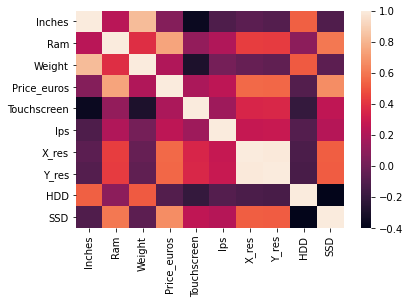

In [93]:
sns.heatmap(df.corr())

C:\Users\Muthu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

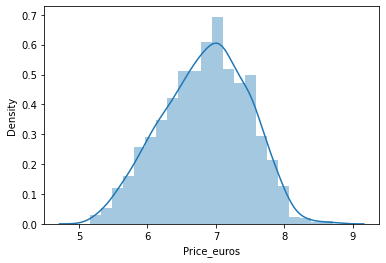

In [94]:
sns.distplot(np.log(df['Price_euros']))

In [104]:
company=df[['Company']]
company=pd.get_dummies(company,drop_first=True)
company.head()

,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
typename=df[['TypeName']]
typename=pd.get_dummies(typename,drop_first=True)
typename.head()

,TypeName_Gaming,TypeName_Netbook,TypeName_Notebook,TypeName_Ultrabook,TypeName_Workstation
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [45]:
cpubrand=df[['Cpu_brand']]
cpubrand=pd.get_dummies(cpubrand,drop_first=True)
cpubrand.head()

,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,0,1,0
4,0,1,0,0


In [46]:
gpubrand=df[['Gpu_brand']]
gpubrand=pd.get_dummies(gpubrand,drop_first=True)
gpubrand.head()

,Gpu_brand_Intel,Gpu_brand_Nvidia
0,1,0
1,1,0
2,1,0
3,0,0
4,1,0


In [47]:
os=df[['os']]
os=pd.get_dummies(os,drop_first=True)
os.head()

,os_Others/No OS/Linux,os_Windows
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [48]:
df=pd.concat([df,company,typename,cpubrand,gpubrand,os],axis=1)

In [106]:
df.head()

,Company,TypeName,Inches,Ram,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res,Cpu_brand,HDD,SSD,Gpu_brand,os
0,Apple,Ultrabook,13.3,8,1.37,1339.69,0,1,2560,1600,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,8,1.34,898.94,0,0,1440,900,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,8,1.86,575.00,0,0,1920,1080,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16,1.83,2537.45,0,1,2880,1800,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,8,1.37,1803.60,0,1,2560,1600,Intel Core i5,0,256,Intel,Mac


In [49]:
df.drop(['Company','os','Cpu_brand','Gpu_brand','TypeName'],axis=1,inplace=True)

In [50]:
df.head()

,Inches,Ram,Weight,Price_euros,Touchscreen,Ips,X_res,Y_res,HDD,SSD,...,TypeName_Ultrabook,TypeName_Workstation,Cpu_brand_Intel Core i3,Cpu_brand_Intel Core i5,Cpu_brand_Intel Core i7,Cpu_brand_Other Intel Processor,Gpu_brand_Intel,Gpu_brand_Nvidia,os_Others/No OS/Linux,os_Windows
0,13.3,8,1.37,1339.69,0,1,2560,1600,0,128,...,1,0,0,1,0,0,1,0,0,0
1,13.3,8,1.34,898.94,0,0,1440,900,0,0,...,1,0,0,1,0,0,1,0,0,0
2,15.6,8,1.86,575.00,0,0,1920,1080,0,256,...,0,0,0,1,0,0,1,0,1,0
3,15.4,16,1.83,2537.45,0,1,2880,1800,0,512,...,1,0,0,0,1,0,0,0,0,0
4,13.3,8,1.37,1803.60,0,1,2560,1600,0,256,...,1,0,0,1,0,0,1,0,0,0


In [107]:
x=df.drop(['Price_euros'],axis=1)
y=np.log(df['Price_euros'])

In [108]:
x

,Company,TypeName,Inches,Ram,Weight,Touchscreen,Ips,X_res,Y_res,Cpu_brand,HDD,SSD,Gpu_brand,os
0,Apple,Ultrabook,13.3,8,1.37,0,1,2560,1600,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,8,1.34,0,0,1440,900,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,8,1.86,0,0,1920,1080,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,16,1.83,0,1,2880,1800,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,8,1.37,0,1,2560,1600,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,1.80,1,1,1920,1080,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,13.3,16,1.30,1,1,3200,1800,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,14.0,2,1.50,0,0,1366,768,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,15.6,6,2.19,0,0,1366,768,Intel Core i7,1000,0,AMD,Windows


In [112]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [113]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1041, 14) (261, 14) (1041,) (261,)


In [111]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [55]:
LR=LinearRegression()
LR.fit(x_train,y_train)
LR_pred=LR.predict(x_test)
print('R2 score ',r2_score(y_test,LR_pred))
print('MAE ',mean_absolute_error(y_test,LR_pred))
print('MSE ',mean_squared_error(y_test,LR_pred))


R2 score  0.8279918109127051
MAE  0.20611798746896914
MSE  0.07321374366129975


In [56]:
RR=Ridge(alpha=10)
RR.fit(x_train,y_train)
RR_pred=RR.predict(x_test)
print('R2 score ',r2_score(y_test,RR_pred))
print('MAE',mean_absolute_error(y_test,RR_pred))
print('MSE', mean_squared_error(y_test,RR_pred))

R2 score  0.8211250912682679
MAE 0.21163163231300383
MSE 0.07613650131899881


In [57]:
lasso=Lasso(alpha=0.001)
lasso.fit(x_train,y_train)
lasso_pred=lasso.predict(x_test)
print('R2 score ',r2_score(y_test,lasso_pred))
print('MAE',mean_absolute_error(y_test,lasso_pred))
print('MSE', mean_squared_error(y_test,lasso_pred))

R2 score  0.8247759936690863
MAE 0.21035217985625837
MSE 0.07458252744179994


C:\Users\Muthu\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.109117158351324, tolerance: 0.03952267173132054
  model = cd_fast.enet_coordinate_descent(


In [58]:
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
print('R2 score ',r2_score(y_test,knn_pred))
print('MAE',mean_absolute_error(y_test,knn_pred))
print('MSE', mean_squared_error(y_test,knn_pred))

R2 score  0.8284873641736166
MAE 0.20071211724349447
MSE 0.07300281585834217


In [59]:
DT=DecisionTreeRegressor(max_depth=8)
DT.fit(x_train,y_train)
DT_pred=DT.predict(x_test)
print('R2 score ',r2_score(y_test,DT_pred))
print('MAE',mean_absolute_error(y_test,DT_pred))
print('MSE', mean_squared_error(y_test,DT_pred))

R2 score  0.844150629807531
MAE 0.1892483081820559
MSE 0.0663358872597377


In [60]:
SVM=SVR(kernel='rbf',C=10000,epsilon=0.1)
SVM.fit(x_train,y_train)
SVM_pred=SVM.predict(x_test)
print('R2 score ',r2_score(y_test,SVM_pred))
print('MAE',mean_absolute_error(y_test,SVM_pred))
print('MSE', mean_squared_error(y_test,SVM_pred))

R2 score  0.817730138593558
MAE 0.21070871524351484
MSE 0.07758153248982469


In [61]:
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
RF_pred=RF.predict(x_test)
print('R2 score ',r2_score(y_test,RF_pred))
print('MAE',mean_absolute_error(y_test,RF_pred))
print('MSE', mean_squared_error(y_test,RF_pred))

R2 score  0.9129502813175429
MAE 0.14486402646841343
MSE 0.0370519323714944


In [114]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,9,12,13])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.9093317997170923
MAE 0.15108035526007738


In [116]:
#Hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
n_estimators=[int(x) for x in np.linspace(100,1200,12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [117]:
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf}
random_grid

{'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [5, 10, 15, 20, 25, 30],
 'min_samples_split': [2, 5, 10, 15, 100],
 'min_samples_leaf': [1, 2, 5, 10]}

In [118]:
rf_random=RandomizedSearchCV(estimator=RF,param_distributions=random_grid,n_iter=100,scoring='neg_mean_squared_error',cv=5,verbose=2,random_state=5,n_jobs=-1)

In [119]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=5, scoring='neg_mean_squared_error', verbose=2)

In [120]:
rf_random.best_params_

{'n_estimators': 900,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30}

In [121]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=30, max_features='sqrt', n_estimators=900)

In [122]:
random_pred=rf_random.predict(x_test)
print('R2 score ',r2_score(y_test,random_pred))
print('MAE',mean_absolute_error(y_test,random_pred))
print('MSE', mean_squared_error(y_test,random_pred))

R2 score  0.9137121797027548
MAE 0.14669974828237248
MSE 0.0367276371541164


In [62]:
AB=AdaBoostRegressor()
AB.fit(x_train,y_train)
AB_pred=AB.predict(x_test)
print('R2 score ',r2_score(y_test,AB_pred))
print('MAE',mean_absolute_error(y_test,AB_pred))
print('MSE', mean_squared_error(y_test,AB_pred))

R2 score  0.8329952475508137
MAE 0.21909337312345656
MSE 0.07108407571123414


In [63]:
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)
GB_pred=GB.predict(x_test)
print('R2 score ',r2_score(y_test,GB_pred))
print('MAE',mean_absolute_error(y_test,GB_pred))
print('MSE', mean_squared_error(y_test,GB_pred))

R2 score  0.8927767068176451
MAE 0.1688503657691584
MSE 0.04563863350476474


In [119]:
import pickle
file2=open('df.pkl','wb')
pickle.dump(df,file2)

In [120]:
file3=open('pipe.pkl','wb')
pickle.dump(pipe,file3)

In [117]:
df.Company.value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Vero           4
Xiaomi         4
Google         3
Chuwi          3
LG             3
Fujitsu        3
Huawei         2
Name: Company, dtype: int64